# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [67]:
df = pd.read_csv("states_edu.csv")
df.head(10)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,NaN,NaN,488476.0,227.0,274.0,222.0,NaN
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,NaN,NaN,104321.0,218.0,263.0,213.0,NaN
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,NaN,NaN,80937.0,193.0,235.0,188.0,NaN
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,NaN,NaN,1981407.0,214.0,260.0,208.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [68]:
# rename columns 
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [69]:
# Identifying the number of na values in each column
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL_ALL_EST                   491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
ENROLL_PREK                      173
ENROLL_KINDER                     83
ENROLL_4                          83
ENROLL_8                          83
ENROLL_12                         83
ENROLL_PRIMARY                   695
ENROLL_HS                        644
ENROLL_ALL                        83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [70]:
# Focus on the average math score of 4 graders
# Drop NA values from the column
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)

In [71]:
# Observe statistical summary of each column
df.describe()

,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,565.000000,3.980000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,3.980000e+02,...,491.000000,491.000000,491.000000,3.980000e+02,4.490000e+02,4.910000e+02,565.000000,564.000000,521.000000,478.000000
mean,2008.653097,9.428040e+05,1.021679e+07,9.105977e+05,4.717920e+06,4.588268e+06,1.032646e+07,5.345064e+06,3.015816e+06,4.874543e+05,...,72460.873727,72431.075356,64304.798371,5.810083e+05,2.878254e+05,9.647332e+05,236.327434,279.310284,219.796545,263.870293
std,7.413808,1.114194e+06,1.285581e+07,1.297155e+06,6.045521e+06,5.987918e+06,1.310309e+07,6.881358e+06,3.657841e+06,5.869066e+05,...,85064.551144,84302.796730,76243.626074,6.854742e+05,3.408781e+05,1.131442e+06,9.285505,9.518487,6.962321,6.513002
min,1990.000000,4.417900e+04,5.594810e+05,3.102000e+04,0.000000e+00,2.209300e+04,5.537320e+05,3.150090e+05,1.523400e+05,2.310700e+04,...,4643.000000,3371.000000,2785.000000,3.769800e+04,1.378100e+04,6.892500e+04,192.000000,235.000000,188.000000,238.000000
25%,2005.000000,2.754622e+05,2.600654e+06,2.342685e+05,1.341450e+06,8.735868e+05,2.520274e+06,1.355798e+06,7.700552e+05,1.290740e+05,...,20499.500000,20926.500000,18536.500000,1.658642e+05,8.157100e+04,2.810865e+05,232.000000,274.000000,216.000000,260.000000
50%,2009.000000,6.625380e+05,5.721013e+06,5.277240e+05,2.906463e+06,2.321530e+06,5.773808e+06,2.976032e+06,1.724142e+06,3.379880e+05,...,50918.000000,49993.000000,41118.000000,4.037075e+05,1.871180e+05,6.774110e+05,238.000000,281.000000,221.000000,265.000000
75%,2015.000000,1.025396e+06,1.166697e+07,1.007900e+06,5.880226e+06,5.228991e+06,1.139698e+07,5.989623e+06,3.474660e+06,5.654545e+05,...,81431.000000,81367.000000,76096.500000,6.452258e+05,3.291480e+05,1.079075e+06,242.000000,286.000000,224.000000,268.000000
max,2019.000000,6.307022e+06,7.824804e+07,9.990221e+06,4.236047e+07,3.494151e+07,7.836596e+07,4.195426e+07,2.350185e+07,3.759373e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.011865e+06,6.437202e+06,253.000000,301.000000,237.000000,280.000000


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 4 Math*

How many years of data are logged in our dataset? 

In [72]:
num_years = df['YEAR'].nunique() # Finding the number of unique values of Year column
print(f'There are {num_years} years of data in our dataset')

There are 13 years of data in our dataset


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [73]:
# By inspection, Ohio has the higher avearge across all years in average math scores of 4 graders.
df.groupby('STATE')['AVG_MATH_4_SCORE'].mean().sort_values(ascending=False)

STATE
NEW_HAMPSHIRE           246.300000
MASSACHUSETTS           246.000000
MINNESOTA               245.000000
NEW_JERSEY              244.000000
VERMONT                 243.000000
KANSAS                  242.600000
WASHINGTON              242.333333
DODEA                   241.600000
WYOMING                 241.454545
NORTH_DAKOTA            241.181818
INDIANA                 241.181818
WISCONSIN               241.000000
VIRGINIA                240.909091
PENNSYLVANIA            240.800000
SOUTH_DAKOTA            240.777778
MONTANA                 240.400000
IOWA                    240.090909
MAINE                   240.000000
CONNECTICUT             239.909091
OHIO                    239.454545
COLORADO                239.400000
NORTH_CAROLINA          238.909091
FLORIDA                 238.800000
TEXAS                   238.363636
UTAH                    238.090909
NEBRASKA                238.000000
DELAWARE                237.200000
IDAHO                   237.000000
MARYLAND      

Find the average for your chosen test across all states in 2019

In [80]:
df_2019 = df[df['YEAR'] == 2019]  # Filtering by 2019 year
df_2019_avg_math = df_2019['AVG_MATH_4_SCORE'].mean()  # Calculating the average of math score of fourth graders.
print(f'The average of math score of fourth graders is {df_2019_avg_math}.')

The average of math score of fourth graders is 239.9433962264151.


For each state, find a maximum value for your chosen test score

In [125]:
df.groupby('STATE')['AVG_MATH_4_SCORE'].max().sort_values(ascending = False)

STATE
NEW_HAMPSHIRE           253.0
MINNESOTA               253.0
MASSACHUSETTS           253.0
DODEA                   250.0
NEW_JERSEY              249.0
INDIANA                 249.0
WYOMING                 248.0
VERMONT                 248.0
KANSAS                  248.0
VIRGINIA                248.0
COLORADO                247.0
MARYLAND                247.0
MAINE                   246.0
NORTH_DAKOTA            246.0
NEBRASKA                246.0
FLORIDA                 246.0
IOWA                    246.0
PENNSYLVANIA            246.0
WASHINGTON              246.0
OHIO                    246.0
NORTH_CAROLINA          245.0
CONNECTICUT             245.0
WISCONSIN               245.0
TEXAS                   244.0
UTAH                    244.0
MONTANA                 244.0
DELAWARE                243.0
HAWAII                  243.0
NEW_YORK                243.0
RHODE_ISLAND            242.0
NATIONAL                242.0
SOUTH_DAKOTA            242.0
KENTUCKY                242.0
IDAH

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [84]:
# Calculating correlation between columns and the average math score of fourth graders.
corr_matrix = df.corr()['AVG_MATH_4_SCORE']

# Print correlation
print(corr_matrix)

YEAR                            0.641322
ENROLL_ALL_EST                 -0.017301
TOTAL_REVENUE                   0.138755
FEDERAL_REVENUE                 0.090260
STATE_REVENUE                   0.102318
LOCAL_REVENUE                   0.175046
TOTAL_EXPENDITURE               0.134774
INSTRUCTION_EXPENDITURE         0.138094
SUPPORT_SERVICES_EXPENDITURE    0.143808
OTHER_EXPENDITURE               0.043537
CAPITAL_OUTLAY_EXPENDITURE      0.074261
ENROLL_PREK                     0.105312
ENROLL_KINDER                  -0.024731
ENROLL_4                       -0.027814
ENROLL_8                       -0.009415
ENROLL_12                       0.037892
ENROLL_PRIMARY                 -0.023409
ENROLL_HS                      -0.002390
ENROLL_ALL                     -0.012243
AVG_MATH_4_SCORE                1.000000
AVG_MATH_8_SCORE                0.910409
AVG_READING_4_SCORE             0.772181
AVG_READING_8_SCORE             0.813690
Name: AVG_MATH_4_SCORE, dtype: float64


Feature engineering justification: **<Generally if the coefficient value is lower than 0.70, it has a weak correlation with the column. AVG_MATH_8_SCORE, AVG_READING_4_SCORE, AVG_READING_8_SCORE are columns that have moderate or strong correlation with the response variable.>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

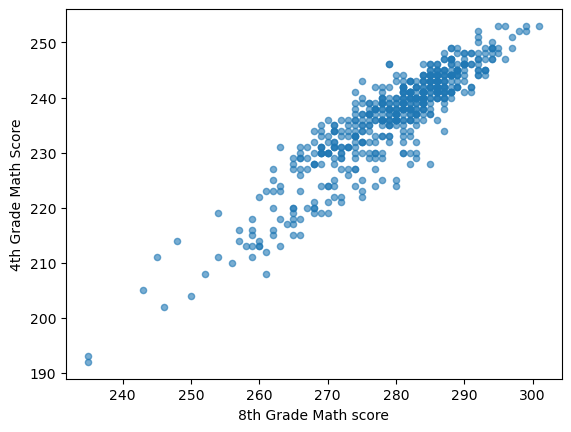

In [94]:
df.plot.scatter(x='AVG_MATH_8_SCORE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('8th Grade Math score')
plt.ylabel('4th Grade Math Score')
plt.show()

**< Between 4th grade math score and 8th grade math score, it shows a strong and positive relationship. The coefficient is 0.91 which is significantly higher than any other columns.>**

**Visualization 2**

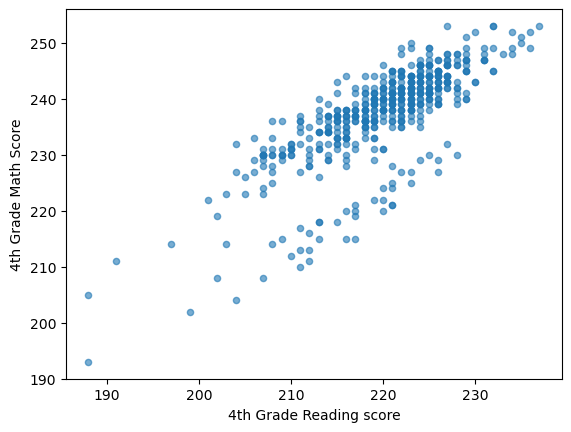

In [95]:
df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('4th Grade Reading score')
plt.ylabel('4th Grade Math Score')
plt.show()

**<Compared to 8th grade math score, the correlation between 4th grade math score and 4th grade reading score seems weaker. Overall trend shows moderate and positive correlation. However, the density between spots is relatively inconsistent as the coefficient is 0.71.>**

**Visualization 3**

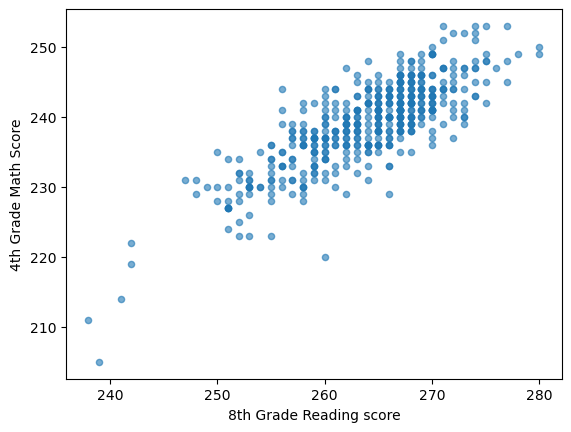

In [100]:
df.plot.scatter(x='AVG_READING_8_SCORE ', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('8th Grade Reading score')
plt.ylabel('4th Grade Math Score')
plt.show()

**<The correlation between 8th grade reading score and 4th grade math score is strong and positive. The coefficient is 0.81 which is strong. There are some outliers however the overall trend is consistent.>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

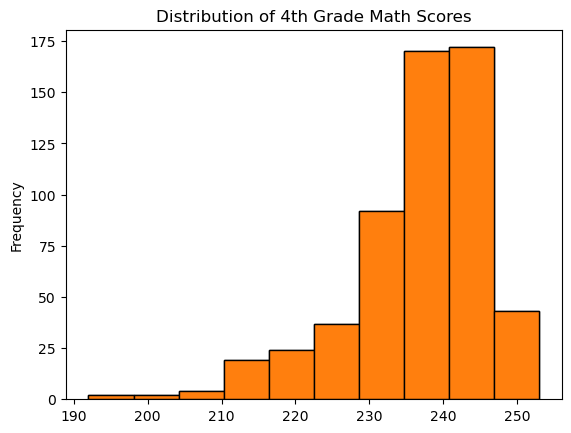

In [103]:
df.AVG_MATH_4_SCORE.plot.hist(title="Distribution of 4th Grade Math Scores", edgecolor="black")
plt.show()

In [107]:
from sklearn.model_selection import train_test_split

In [101]:
X = df[['AVG_MATH_8_SCORE','AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']].dropna()
y = y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [104]:
# As the distribution of y variable is left-skewed, fill n/a values with median value that is tolerant to skewed distribution
y.fillna(y.median(), inplace=True)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [109]:
# import liner regression from sklearn
from sklearn.linear_model import LinearRegression

In [110]:
# creating a model 
model = LinearRegression()

In [111]:
# Fitting the model by train data
model.fit(X_train, y_train)

LinearRegression()

In [112]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [113]:
# Intercept and coefficients of the model
print(model.intercept_)
print(model.coef_)

51.20067006700884
[ 0.65681839  0.52776338 -0.42878371]


In [114]:
# R^2 value ot this model is 0.90, showing good fit for the data
model.score(X_test, y_test)

0.9061423661640629

In [124]:
# Mean absolute error indicates the extent of deviation between true values and predicted values
# In this case, 1.57 implies that the model does not have large devation between true values and predicted values
np.mean(np.abs(model.predict(X_test)-y_test))

1.5767996844686134

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

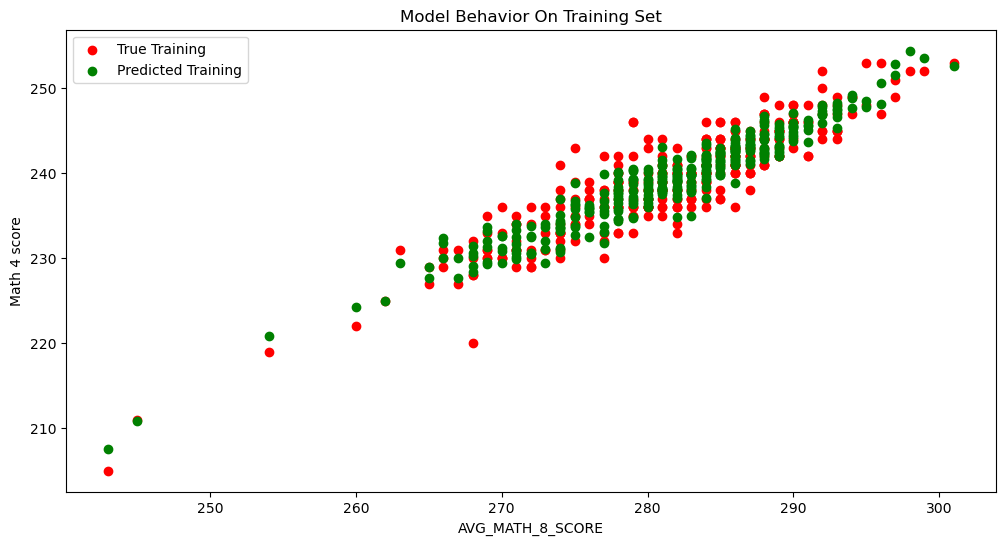

In [118]:
col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 4 score')
plt.title("Model Behavior On Training Set")
plt.show()

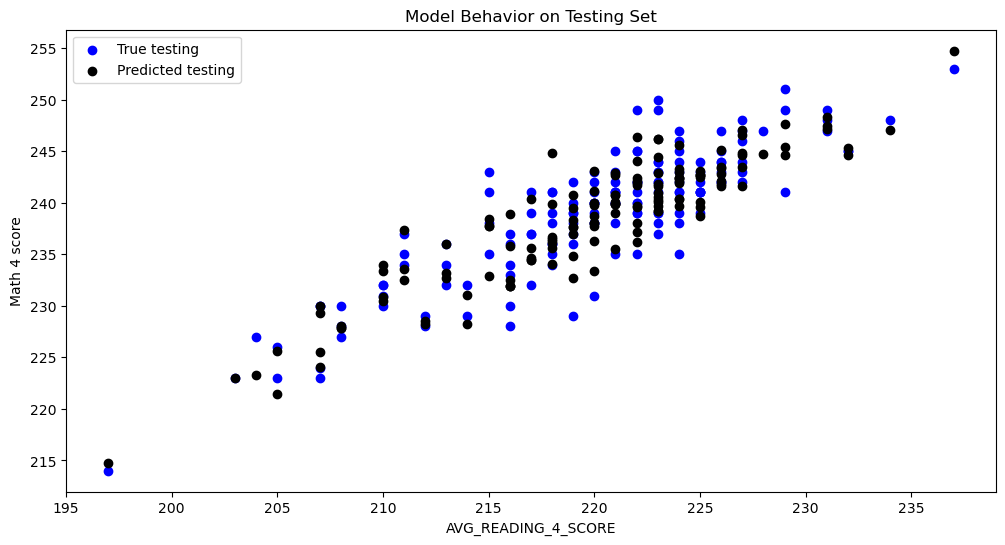

In [122]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 4 score')
plt.title("Model Behavior on Testing Set")
plt.show()

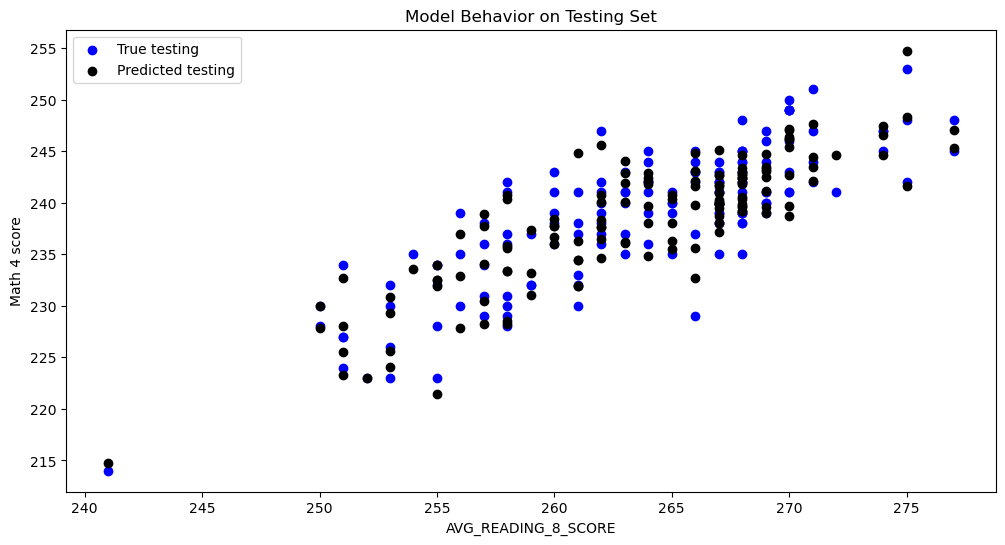

In [123]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 4 score')
plt.title("Model Behavior on Testing Set")
plt.show()

Overall, the model with selected features fits well. The difference between true values and predicted values does not show large difference and also the trend of the graphs is consistent. 